In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px

## 1. Reading Data

In [2]:
data = 'D:\\Kuliah\\MSIB5\\Hacktiv8\\Leason\\AssignmentPython2\\dataSet\\nyc-rolling-sales.csv'
df = pd.read_csv(data)
pd.set_option('display.max_columns', 50)
df.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  \
0    6                                  C2            153 AVENUE B   
1   26                                  C7   234 EAST 4TH   STREET   
2   39                                  C7   197 EAST 3RD   STREET   
3   21                                  C4     154 EAST 7TH STREET   
4   55                                  C2  301 EAST 10TH   STREET   

  APARTMENT NUMBER  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
0                      10009                  5                 0   
1                      10009                 28                 3   
2                      10009                 16                 1   
3                      10009                 10                 0   
4                      10009                  6                 0   

   TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  YEAR BUILT  \
0            5             1633              6440        1900   
1           31             4616             18690        1900   
2           17             2212              7803        1900   
3           10             2272              6794        1913   
4            6             2369              4615        1900   

   TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE SALE PRICE  \
0                          2                             C2    6625000   
1                          2                             C7        -     
2                          2                             C7        -     
3                          2                             C4    3936272   
4                          2                             C2    8000000   

             SALE DATE  
0  2017-07-19 00:00:00  
1  2016-12-14 00:00:00  
2  2016-12-09 00:00:00  
3  2016-09-23 00:00:00  
4  2016-11-17 00:00:00

In [3]:
df.nunique()

Unnamed: 0                        26736
BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6062
GROSS SQUARE FEET                  5691
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10008
SALE DATE                           364
dtype: int64

dapat dilihat bahwa EASE-MENT hanya memiliki 1 jenis value, juga pada `df.head()` dilihat bahwa kolom EASE-MENT kosong berarti semua value dari kolom EASE-MENT akan kosong, **bisa di hapus** 

In [4]:
df = df.drop(['Unnamed: 0', 'EASE-MENT'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

**Self NOTE**

- BOROUGH ganti dari angka jadi sesuai
- LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE jadi int64/float64
- TAX CLASS AT TIME OF SALE, TAX CLASS AT PRESENT categorical
- SALE DATE jadi date

In [5]:
#ubah angka jadi nama borough
boroughSTR = { 
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Staten Island",          
} #diambil dari deskripsi kagglenya

df['BOROUGH'] = df['BOROUGH'].replace(boroughSTR)
df.head()

BOROUGH   NEIGHBORHOOD                      BUILDING CLASS CATEGORY  \
0  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
1  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
2  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
3  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
4  Manhattan  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  TAX CLASS AT PRESENT  BLOCK  LOT BUILDING CLASS AT PRESENT  \
0                   2A    392    6                        C2   
1                    2    399   26                        C7   
2                    2    399   39                        C7   
3                   2B    402   21                        C4   
4                   2A    404   55                        C2   

                  ADDRESS APARTMENT NUMBER  ZIP CODE  RESIDENTIAL UNITS  \
0            153 AVENUE B                      10009                  5   
1   234 EAST 4TH   STREET                      10009                 28   
2   197 EAST 3RD   STREET                      10009                 16   
3     154 EAST 7TH STREET                      10009                 10   
4  301 EAST 10TH   STREET                      10009                  6   

   COMMERCIAL UNITS  TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  \
0                 0            5             1633              6440   
1                 3           31             4616             18690   
2                 1           17             2212              7803   
3                 0           10             2272              6794   
4                 0            6             2369              4615   

   YEAR BUILT  TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  \
0        1900                          2                             C2   
1        1900                          2                             C7   
2        1900                          2                             C7   
3        1913                          2                             C4   
4        1900                          2                             C2   

  SALE PRICE            SALE DATE  
0    6625000  2017-07-19 00:00:00  
1        -    2016-12-14 00:00:00  
2        -    2016-12-09 00:00:00  
3    3936272  2016-09-23 00:00:00  
4    8000000  2016-11-17 00:00:00

In [6]:
df['SALE PRICE'] = df['SALE PRICE'].str.strip()
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors = 'coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors = 'coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors = 'coerce')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category') 
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category') 
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors = 'coerce')
df.duplicated(df.columns).sum()


765

## 2. Data Inspection

In [7]:
df = df.drop_duplicates(df.columns, keep= 'last', inplace=False)
df.duplicated(df.columns).sum()

0

In [8]:
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df) *100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.880847
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.880847
ADDRESS                            0.000000
APARTMENT NUMBER                  77.502596
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.097001
GROSS SQUARE FEET                 32.685628
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        16.919900
SALE DATE                          0.000000
dtype: float64

In [9]:
df = df.drop(['APARTMENT NUMBER'], axis=1)

In [10]:
df = df[df['SALE PRICE'].notnull()]
df = df[df['LAND SQUARE FEET'].notnull()]
df = df[df['GROSS SQUARE FEET'].notnull()]

In [11]:
fig = px.box(df, x='SALE PRICE')
fig.update_xaxes(type='linear')
fig.update_layout(title='SALE PRICE in USD')
fig.show()

terlihat bahwa ada outliner

In [12]:
df.describe()

BLOCK           LOT      ZIP CODE  RESIDENTIAL UNITS  \
count  47896.000000  47896.000000  47896.000000       47896.000000   
mean    4994.514970    234.777205  10940.163500           2.534888   
min        1.000000      1.000000      0.000000           0.000000   
25%     2223.750000     21.000000  10469.000000           1.000000   
50%     4666.000000     45.000000  11217.000000           1.000000   
75%     7008.000000     94.000000  11238.000000           2.000000   
max    16319.000000   9009.000000  11694.000000        1844.000000   
std     3429.465212    495.924368   1074.738599          17.169930   

       COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
count      47896.000000  47896.000000      4.789600e+04       4.789600e+04   
mean           0.237473      2.791319      3.270904e+03       3.525875e+03   
min            0.000000      0.000000      0.000000e+00       0.000000e+00   
25%            0.000000      1.000000      1.400750e+03       8.157500e+02   
50%            0.000000      1.000000      2.133000e+03       1.620000e+03   
75%            0.000000      2.000000      3.050000e+03       2.508000e+03   
max         2261.000000   2261.000000      4.228300e+06       3.750565e+06   
std           10.845527     20.427834      3.054984e+04       2.920511e+04   

         YEAR BUILT    SALE PRICE                      SALE DATE  
count  47896.000000  4.789600e+04                          47896  
mean    1828.445152  1.158310e+06  2017-02-25 18:31:19.672623872  
min        0.000000  0.000000e+00            2016-09-01 00:00:00  
25%     1920.000000  1.000000e+05            2016-11-29 00:00:00  
50%     1931.000000  4.850000e+05            2017-02-27 00:00:00  
75%     1961.000000  8.350000e+05            2017-05-26 00:00:00  
max     2017.000000  2.210000e+09            2017-08-31 00:00:00  
std      463.083421  1.344264e+07                            NaN

- Land Square Feet dan Gross Square Feet memiliki nilai 0 = tidak mungkin
- Year Built ada nilai 0 = tidak mungkin rumah di bangun tahun 0 (sudah jadi tempat sejarah seharusnya)
-  Sale Price ada nilai 0 = di jelaskan di kaggle bahwa `These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.`
- ZIP Code nilai 0 = tidak ada ZIP Code dengan nilai 0.

In [13]:
df =df[df['LAND SQUARE FEET']>0]
df =df[df['GROSS SQUARE FEET']>0]
df =df[df['YEAR BUILT']>0]
df =df[df['SALE PRICE']>0]
#untuk sementara ZIP CODE akan diabaikan karena tidak tau akan dipakai atau tidak

In [14]:
df.describe()

BLOCK           LOT      ZIP CODE  RESIDENTIAL UNITS  \
count  29200.000000  29200.000000  29200.000000       29200.000000   
mean    5559.985479     61.539863  10994.887226           3.040171   
min        5.000000      1.000000      0.000000           0.000000   
25%     2693.750000     19.000000  10462.000000           1.000000   
50%     4916.500000     38.000000  11221.000000           2.000000   
75%     7847.000000     64.000000  11373.000000           2.000000   
max    16319.000000   7501.000000  11694.000000        1844.000000   
std     3778.249103    124.742492    520.885926          19.967061   

       COMMERCIAL UNITS   TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
count      29200.000000  29200.000000      2.920000e+04       2.920000e+04   
mean           0.311267      3.350034      4.214948e+03       4.439220e+03   
min            0.000000      0.000000      2.000000e+02       1.200000e+02   
25%            0.000000      1.000000      2.000000e+03       1.360000e+03   
50%            0.000000      2.000000      2.500000e+03       1.872000e+03   
75%            0.000000      2.000000      4.000000e+03       2.666000e+03   
max         2261.000000   2261.000000      4.228300e+06       3.750565e+06   
std           13.813581     24.417404      3.846465e+04       3.382420e+04   

         YEAR BUILT    SALE PRICE                      SALE DATE  
count  29200.000000  2.920000e+04                          29200  
mean    1940.616918  1.640601e+06  2017-02-25 13:05:35.342465792  
min     1800.000000  1.000000e+00            2016-09-01 00:00:00  
25%     1920.000000  4.200000e+05            2016-11-29 00:00:00  
50%     1930.000000  6.200000e+05            2017-02-27 00:00:00  
75%     1960.000000  9.500000e+05            2017-05-26 00:00:00  
max     2017.000000  2.210000e+09            2017-08-31 00:00:00  
std       30.448708  1.702376e+07                            NaN

cek ulang, karena dipastikan datanya ganti setelah di kurangin 0

In [15]:
df.shape

(29200, 19)

jumlah data berkurang secara signifikan menjadi 29200, cek ulang outliner

In [16]:
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Create the cumulative distribution plot using Plotly Express
fig = px.scatter(x, x='PROPERTY PROPORTION', y='SALE PRICE')
fig.update_traces(mode='markers+lines', marker=dict(symbol='circle-open', size=4))
fig.update_layout(title='Cumulative Distribution of Properties according to Price')
fig.update_xaxes(title='Percentage of Properties in ascending order of Price')
fig.update_yaxes(title='Sale Price')
fig.show()


terlihat masih ada harga tidak masuk akal sepert 1, 10 dan sebagainya juga hilangkan outliner

In [17]:
#df = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 5000000)]

In [18]:
df = df[(df['SALE PRICE'] > 10000) & (df['SALE PRICE'] < 25000000)]

dipilih batas atas 40.000.000 karena setelahnya jaraknya sangat jauh, walau outliner masih tajam

In [19]:
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION'] = 1
x['PROPERTY PROPORTION'] = x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION'] / len(x['PROPERTY PROPORTION'])

# Create the cumulative distribution plot using Plotly Express
fig = px.scatter(x, x='PROPERTY PROPORTION', y='SALE PRICE')
fig.update_traces(mode='markers+lines', marker=dict(symbol='circle-open', size=4))
fig.update_layout(title='Cumulative Distribution of Properties according to Price')
fig.update_xaxes(title='Percentage of Properties in ascending order of Price')
fig.update_yaxes(title='Sale Price')
fig.show()


In [20]:
fig = px.box(df, x='SALE PRICE')
fig.update_xaxes(type='linear')
fig.update_layout(title='SALE PRICE in USD')
fig.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_14652\3987968148.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


d:\Program_Data\Anaconda3\envs\AssP2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Program_Data\Anaconda3\envs\AssP2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



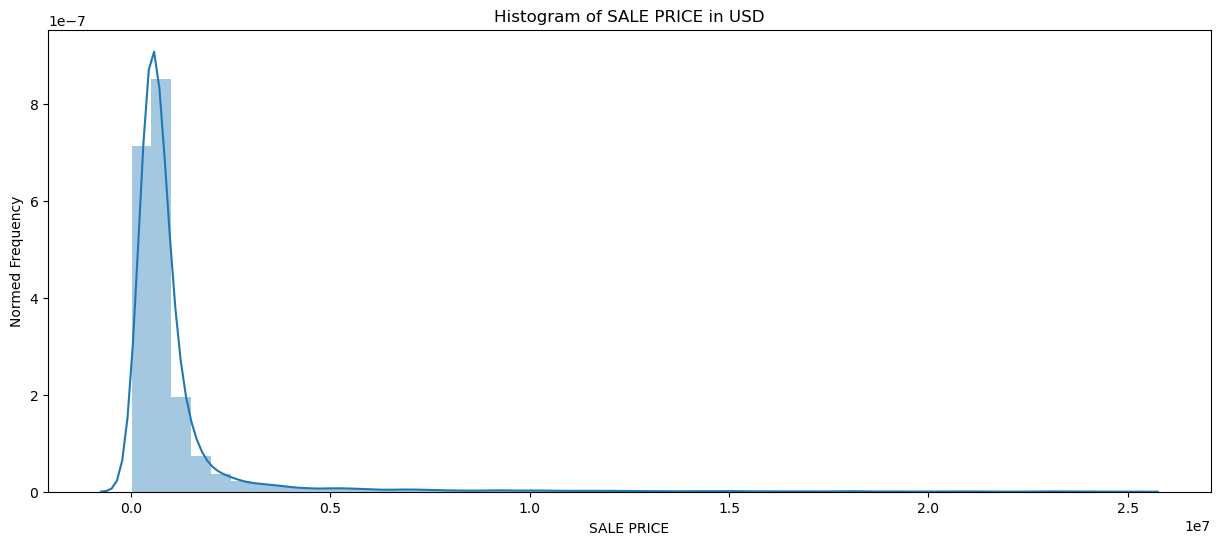

In [21]:
#Set the size of the plot
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.distplot(df['SALE PRICE'])
plt.title('Histogram of SALE PRICE in USD')
plt.ylabel('Normed Frequency')
plt.show()

0.4951476315531395


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14652\3322138050.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


d:\Program_Data\Anaconda3\envs\AssP2\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

d:\Program_Data\Anaconda3\envs\AssP2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='SALE PRICE', ylabel='Density'>

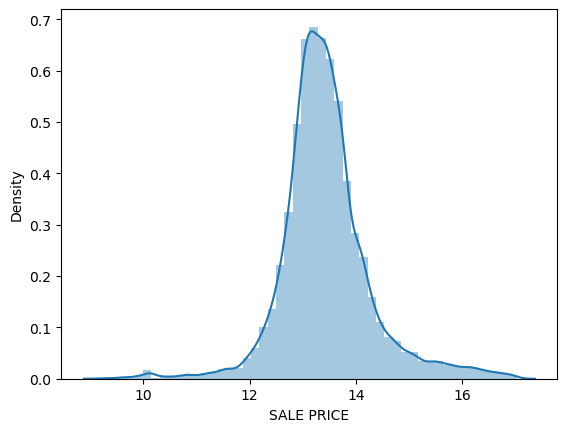

In [22]:
saleDistribution=np.log(df['SALE PRICE'])
print(saleDistribution.skew())
sns.distplot(saleDistribution)

data sudah lumayan terdistribusi dengan baik


# MEAN

In [23]:
saledate = df['SALE DATE']

### Rata-rata harga jual properti setiap Borough

In [24]:
borough_price_mean = df.groupby('BOROUGH')['SALE PRICE'].mean()
fig_BRPR_mean = px.bar(x =borough_price_mean.index, y=borough_price_mean.values, labels={'x':'Borough', 'y':'Average Price'}, title="Average Price each Borough")
fig_BRPR_mean.update_xaxes(categoryorder='total ascending')
fig_BRPR_mean.show()

dengan menghitung rata-rata dari harga jual pada setiap borough dapat di ambil kesimpulan bahwa Manhattan memiliki rata-rata penjualan dengan harga tertinggi dibandingkan borough lainnya, sedangkan Staten Island dan Bronx menurut hipotesis saya memiliki rata-rata harga properti yang mirip. akan saya coba buktikan pada bagian Hyupotesis Testing

### Rata-rata jumlah unit terjual dari 2016-2017 setiap bulannya

In [25]:
df['YEAR_MONTH_SOLD'] = df['SALE DATE'].dt.strftime('%Y-%m')
df['YEAR_SOLD'] = df['SALE DATE'].dt.month
df['MONTH_SOLD'] = df['SALE DATE'].dt.year

df['YEAR_MONTH_SOLD'] = pd.to_datetime(df['YEAR_MONTH_SOLD'])
df

BOROUGH   NEIGHBORHOOD  \
0          Manhattan  ALPHABET CITY   
3          Manhattan  ALPHABET CITY   
4          Manhattan  ALPHABET CITY   
6          Manhattan  ALPHABET CITY   
9          Manhattan  ALPHABET CITY   
...              ...            ...   
84543  Staten Island        WOODROW   
84544  Staten Island        WOODROW   
84545  Staten Island        WOODROW   
84546  Staten Island        WOODROW   
84547  Staten Island        WOODROW   

                           BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0      07 RENTALS - WALKUP APARTMENTS                                2A   
3      07 RENTALS - WALKUP APARTMENTS                                2B   
4      07 RENTALS - WALKUP APARTMENTS                                2A   
6      07 RENTALS - WALKUP APARTMENTS                                2B   
9      08 RENTALS - ELEVATOR APARTMENTS                               2   
...                                            ...                  ...   
84543  02 TWO FAMILY DWELLINGS                                        1   
84544  02 TWO FAMILY DWELLINGS                                        1   
84545  02 TWO FAMILY DWELLINGS                                        1   
84546  22 STORE BUILDINGS                                             4   
84547  35 INDOOR PUBLIC AND CULTURAL FACILITIES                       4   

       BLOCK  LOT BUILDING CLASS AT PRESENT                 ADDRESS  ZIP CODE  \
0        392    6                        C2            153 AVENUE B     10009   
3        402   21                        C4     154 EAST 7TH STREET     10009   
4        404   55                        C2  301 EAST 10TH   STREET     10009   
6        406   32                        C4            210 AVENUE B     10009   
9        387  153                        D9     629 EAST 5TH STREET     10009   
...      ...  ...                       ...                     ...       ...   
84543   7349   34                        B9           37 QUAIL LANE     10309   
84544   7349   78                        B9        32 PHEASANT LANE     10309   
84545   7351   60                        B2        49 PITNEY AVENUE     10309   
84546   7100   28                        K6   2730 ARTHUR KILL ROAD     10309   
84547   7105  679                        P9       155 CLAY PIT ROAD     10309   

       RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  \
0                      5                 0            5            1633.0   
3                     10                 0           10            2272.0   
4                      6                 0            6            2369.0   
6                      8                 0            8            1750.0   
9                     24                 0           24            4489.0   
...                  ...               ...          ...               ...   
84543                  2                 0            2            2400.0   
84544                  2                 0            2            2498.0   
84545                  2                 0            2            4000.0   
84546                  0                 7            7          208033.0   
84547                  0                 1            1           10796.0   

       GROSS SQUARE FEET  YEAR BUILT TAX CLASS AT TIME OF SALE  \
0                 6440.0        1900                         2   
3                 6794.0        1913                         2   
4                 4615.0        1900                         2   
6                 4226.0        1920                         2   
9                18523.0        1920                         2   
...                  ...         ...                       ...   
84543             2575.0        1998                         1   
84544             2377.0        1998                         1   
84545             1496.0        1925                         1   
84546            64117.0        2001                         4   
84547             2

In [26]:
totalUnit_MoYe_sum = df.groupby(['YEAR_MONTH_SOLD'])['TOTAL UNITS'].sum().reset_index()
fig = px.line(totalUnit_MoYe_sum, x='YEAR_MONTH_SOLD', y='TOTAL UNITS',
              labels={'YEAR_MONTH_SOLD': 'Month', 'TOTAL UNITS': 'Unit Sold'},
              title="Total Units Sold Over Time")
fig.show()

d:\Program_Data\Anaconda3\envs\AssP2\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



pada grafik time series diatas dapat dilihat bahwa tren penjualan properti menunurun secara terus menerus.

In [27]:
totalUnit_MoYe_mean = df.groupby(['YEAR_MONTH_SOLD'])['TOTAL UNITS'].mean().reset_index()

fig = px.line(totalUnit_MoYe_mean, x='YEAR_MONTH_SOLD', y='TOTAL UNITS',
              labels={'YEAR_MONTH_SOLD': 'Month', 'TOTAL UNITS': 'Average Unit Sold'},
              title="Average Total Units Sold Over Time")
fig.show()

d:\Program_Data\Anaconda3\envs\AssP2\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



dengan rata-rata jumlah unit terjual perharinya setiap bulan adalah 3

### Rata-rata harga jual properti pada tahun 2016 dan 20017

In [28]:
price_MoYe_mean = df.groupby(['YEAR_MONTH_SOLD'])['SALE PRICE'].mean().reset_index()

fig = px.line(price_MoYe_mean, x='YEAR_MONTH_SOLD', y='SALE PRICE',
              labels={'YEAR_MONTH_SOLD': 'Month', 'SALE PRICE': 'Average Price'},
              title="Average Price Sold Over Time")
fig.show()

d:\Program_Data\Anaconda3\envs\AssP2\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Berdasarkan time series harga properti, dapat disimpulkan bahwa saat rata-rata harga turun, jumlah pembelian properti meningkat. Namun, ada kasus khusus di mana saat harga properti terus menurun, jumlah pembelian properti justru menurun. Hal ini mungkin dikarenakan orang-orang merasa rugi membeli properti dengan harga yang terus turun. Selain itu, pada awal kenaikan harga properti, jumlah pembelian properti juga sedikit meningkat. Hal ini mungkin dikarenakan orang-orang ingin mengambil keuntungan dari kenaikan harga properti.

### Rata-rata jumlah property yang terjual di setiap Borough

In [29]:
borough_ToU_mean = df.groupby(['BOROUGH'])['TOTAL UNITS'].mean().reset_index()

fig_BrToU_mean = px.bar(data_frame=borough_ToU_mean, x='BOROUGH', y='TOTAL UNITS',
                       labels={'BOROUGH': 'Borough', 'TOTAL UNITS': 'Average Unit Sold'},
                       title="Average Unit Sold each Borough")

fig_BrToU_mean.show()

pada grafik sebelumnya dapat dilihiat bahwa Manhattan memiliki rata-rata harga yang paling tinggi dari Borough lainnya, akan tetapi rata-rata jumlah unit yang terjual adalah yang paling tinggi, hal ini dapat diperkirakan bahwa property pada manhattan cenderung bukan untuk tempat tinggal melainkan bisnis property mewah, akan saya coba dengan mencari rata-rata jumlah unit yang terjual berdasarkan jenis propertinya di setiap borough

### Rata-rata total unit terjual berdasarkan jenis properti dan Borough

In [30]:
ToU_BrPrTp_mean = df.groupby(['BOROUGH', 'BUILDING CLASS CATEGORY'])['TOTAL UNITS'].mean().reset_index()

fig_ToU_BrPrTp_mean = px.bar(data_frame=ToU_BrPrTp_mean, x='BOROUGH', y='TOTAL UNITS',
                       color='BUILDING CLASS CATEGORY',
                       labels={'BOROUGH': 'Borough', 'TOTAL UNITS': 'Average Unit Sold'},
                       title="Average Unit Sold by Property Type and Borough")

fig_ToU_BrPrTp_mean.show()

note : dapat di zoom bagian manhattan<br>
dapat dilihat bahwa pada manhattan bahwa Rental Elevator Apartments di manhattan cukup tinggi unit terjualnya daripada borough lain menandakan bahwa jual beli apartment sering terjadi, data ini membuktikan bahwa perkiraan sebelumnya salah mengenai Manhattan yang dijadikan bisnis property mewah adalah salah,

# MEDIAN

### Median Time-series Harga Property 

In [ ]:
median_sales_per_year = df.groupby(df['YEAR_MONTH_SOLD'])['SALE PRICE'].median().reset_index()
fig_MoYePrice_median = px.line(median_sales_per_year, x='YEAR_MONTH_SOLD', y='SALE PRICE',
                            labels={'YEAR_MONTH_SOLD': 'Date ', 'SALE PRICE': 'Median Sale Price '},
                            title='Time Series Median Sale Price')
fig_MoYePrice_median.show()

d:\Program_Data\Anaconda3\envs\AssP2\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Berdasarkan line chart di atas, dapat dilihat bahwa ada beberapa periode harga property yang stabil, yaitu Maret-April 2017, Juni-Juli 2017, dan Oktober-November 2016. Jika harga property cenderung stabil, maka grafik rata-rata total penjual unit akan naik. Hal ini karena orang-orang akan lebih cenderung membeli property saat harga turun atau stabil.

### Median Harga Property tiap Borough

In [48]:
borough_price_median = df.groupby('BOROUGH')['SALE PRICE'].median().reset_index()
borough_price_median = borough_price_median.sort_values(by='SALE PRICE', ascending=False)
borough_price_median

fig_borough_price_median = px.bar(borough_price_median, x='BOROUGH', y='SALE PRICE',
                            labels={'BOROUGH': 'Borough', 'SALE PRICE': 'Median Sale Price'},
                            title='Median Sale Price by Borough')

fig_borough_price_median.show

Manhattan tetap menempati rangking paling atas dengan harga property paling mahal. sedangkan Bronx dan Staten Island memiliki nilai yang sama.

# MODUS

In [ ]:
price_MoYe_mode = df.groupby(['YEAR_MONTH_SOLD'])['SALE PRICE'].apply(lambda x: x.mode().values[0] if not x.mode().empty else None).reset_index()

fig = px.line(price_MoYe_mode, x='YEAR_MONTH_SOLD', y='SALE PRICE',
              labels={'YEAR_MONTH_SOLD': 'Month', 'SALE PRICE': 'Mode Price'},
              title="Mode Price Sold Over Time")
fig.show()

d:\Program_Data\Anaconda3\envs\AssP2\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Pada chart di atas, dapat dilihat naik turunnya harga property dengan harga paling sering terjual. Pada bulan Juni-Juli, harga stabil di angka 450k USD, kemudian naik secara tajam. Jika dilihat dari rata-rata jumlah unit terjual, pada bulan Juni-Juli, jumlah unit yang terjual meningkat secara tajam karena harga yang rendah. Kenaikan harga property pada bulan selanjutnya disebabkan oleh banyaknya permintaan pasar.

### Modus harga property tiap borough

In [52]:
borough_price_mode = df.groupby('BOROUGH')['SALE PRICE'].apply(lambda x: x.mode().values[0] if not x.mode().empty else None)
borough_price_mode.sort_values(ascending=False)

fig_BRPR_mode = px.bar(x =borough_price_mode.index, y=borough_price_mode.values, labels={'x':'Borough', 'y':'Mode Price'}, title="Mode Price each Borough")
fig_BRPR_mode.update_xaxes(categoryorder='total descending')
fig_BRPR_mode.show()

dapat dilihat dari plot diatas bahwa walau rata-rata menunjukan harga property sekitar 7M di Manhattan akan tetapi properti paling banyak terjual di angka sekitar 8M USD, akan tetapi pada Staten Island  tidak jauh berbeda dengan Bronx, dan bronx juga tidak jauh berbeda dari Quenss, sehingga rata rata dari ketiga borough ada di Bronx, akan saya coba buktikan di uji hipotesis.
<br>
selain itu dapat disimpulkan bahwa masih ada property dengan harga dibawah 500k USD
<br><br><br>
*gak masuk akal kalo pake gaji indo, di kurs ke rupiah jadi sekitar 127 milyar<br>
** diatas langit masih ada umr rendah

In [32]:
tp_Price_mode = df.groupby('BUILDING CLASS CATEGORY')['SALE PRICE'].apply(lambda x: x.mode().values[0] if not x.mode().empty else None)
tp_Price_mode.sort_values(ascending=False)

fig_tp_price_mode = px.bar(x =tp_Price_mode.index, y=tp_Price_mode.values, labels={'x':'Building class', 'y':'Mode Price'}, title="Mode Price each Building Category")
fig_tp_price_mode.update_xaxes(categoryorder='total descending')
fig_tp_price_mode.show()

dapat dilihat bahwa harga tertinggi adalah untuk apartemen dengan elevator yang paling banyak terjual dengan harha 18M USD,

# RANGE

In [59]:
# Mengelompokkan data berdasarkan Borough dan menghitung min max value tiap borough.
brSalePrice_RangeGr = df.groupby('BOROUGH')['SALE PRICE'].agg(['min', 'max'])
# Menambahkan kolom baru `Range` yang diisi dengan selisih Min dan Max.
brSalePrice_RangeGr['RANGE']= brSalePrice_RangeGr['max'] - brSalePrice_RangeGr['min']
# Menampilkan dataframe dengan mengurutkan berdasarkan value dari range.
brSalePrice_RangeGr.sort_values(by='RANGE', ascending=False)

min         max       RANGE
BOROUGH                                       
Manhattan      10050.0  24991000.0  24980950.0
Bronx          12000.0  24800000.0  24788000.0
Queens         10001.0  24400000.0  24389999.0
Brooklyn       11750.0  24200000.0  24188250.0
Staten Island  10500.0  11900000.0  11889500.0

dari data range ini terlihat nahwa semua borough cendertung memiliki variasi harga yang banyak, apabila dibandingkan dengan wilayah lain, Staten Island memiliki range yang paling rendah, ini menandakan bahwa harga di Staten Islan cenderung konsisten bila dibandingkan borough lain

# VARIANCE

In [66]:
#grouping  berdasarkan borough dan sale price serta menggunakan .var untuk melihat variasinya data
brPrice_var = df.groupby(['BOROUGH'])['SALE PRICE'].var().reset_index()
brPrice_var.sort_values(by='SALE PRICE', ascending=False)

BOROUGH    SALE PRICE
2      Manhattan  3.130502e+13
0          Bronx  3.097763e+12
1       Brooklyn  2.871016e+12
3         Queens  1.643977e+12
4  Staten Island  2.251860e+11

In [68]:
fig_brPrice_var = px.bar(brPrice_var, x='BOROUGH', y='SALE PRICE', 
             labels={'BOROUGH': 'Borough', 'SALE PRICE': 'Variance'},
             title="Variance of Sale Price by Borough")
fig_brPrice_var.show()

disini dapat dilihat bahwa Manhattan memiliki varians yang jauh lebih tinggi (sekitar 13 triliun) dibandingkan dengan borough lainnya. Varians yang tinggi menunjukkan bahwa harga penjualan properti di Manhattan sangat bervariasi, dengan selisih yang signifikan antara harga properti yang satu dengan yang lain juga menunjukkan bahwa tren harga yang tidak stabil.<br>
Staten Island memiliki varians yang paling rendah, sekitar 225 miliar, menunjukkan bahwa penjualan properti di sana cenderung memiliki harga yang lebih seragam atau tidak terlalu bervariasi apabila dibandingkan dengan yang lainnya.

# STANDAR DEVIATION

In [79]:
#grouping + m,enghitung standar deviasi
std_Brprice = df.groupby('BOROUGH')['SALE PRICE'].std()

std_Brprice.sort_values(ascending=False)

BOROUGH
Manhattan        5.595089e+06
Bronx            1.760046e+06
Brooklyn         1.694407e+06
Queens           1.282177e+06
Staten Island    4.745376e+05
Name: SALE PRICE, dtype: float64

persebaran data cenderung sangat luas di Manhattan, dan tersendah di State Island, sedangkan Bronx dan Brooklyn cenderung sama.

# PROBABILITY DISTRIBUTION

# CONFIDENCE INTERVAL

In [75]:

# Filter data untuk wilayah Manhattan
manhattan_data = df[df['BOROUGH'] == 'Manhattan']

# Menghitung rata-rata harga jual dan standard error dari rata-rata
mean_price = manhattan_data['SALE PRICE'].mean()
se_price = stats.sem(manhattan_data['SALE PRICE'])

# Menghitung confidence interval dengan tingkat kepercayaan 95%
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
margin_of_error = z_score * se_price

lower_bound = mean_price - margin_of_error
upper_bound = mean_price + margin_of_error

print(f"Rata-rata harga jual di Manhattan: ${mean_price:.2f}")
print(f"Margin of Error: ${margin_of_error:.2f}")
print(f"Confidence Interval: (${lower_bound:.2f}, ${upper_bound:.2f})")


Rata-rata harga jual di Manhattan: $7054847.73
Margin of Error: $384364.16
Confidence Interval: ($6670483.57, $7439211.89)


di Manhattan harga cenderung tidak stabil

In [76]:

# Filter data untuk wilayah Staten Island
Staten_data = df[df['BOROUGH'] == 'Staten Island']

# Menghitung rata-rata harga jual dan standard error dari rata-rata
mean_price = Staten_data['SALE PRICE'].mean()
se_price = stats.sem(Staten_data['SALE PRICE'])

# Menghitung confidence interval dengan tingkat kepercayaan 95%
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)
margin_of_error = z_score * se_price

lower_bound = mean_price - margin_of_error
upper_bound = mean_price + margin_of_error

print(f"Rata-rata harga jual di Staten: ${mean_price:.2f}")
print(f"Margin of Error: ${margin_of_error:.2f}")
print(f"Confidence Interval: (${lower_bound:.2f}, ${upper_bound:.2f})")


Rata-rata harga jual di Staten: $543328.54
Margin of Error: $13284.10
Confidence Interval: ($530044.44, $556612.64)


harga di Staten Island cenderung stabil, juga denga perkiraan harga yang rendah

# HYPOTHESIS TESTING

H0 : rata-rata harga properti di Quenss dan Bronx sama atau hampir sama<br>
H1 : rata-rata harga properti di Quenss dan Bronx berbeda cukup jauh

alpha 0.005

In [72]:
alpha = 0.05
avg_Queens = df[df['BOROUGH'] == 'Queens']['SALE PRICE'].mean()
avg_Bronx = df[df['BOROUGH'] == 'Bronx']['SALE PRICE'].mean()

SD_Queens = np.std(df[df['BOROUGH'] == 'Queens']['SALE PRICE'])
SD_Bronx = np.std(df[df['BOROUGH'] == 'Bronx']['SALE PRICE'])

n_Queens = len(df[df['BOROUGH'] == 'Queens'])
n_Bronx = len(df[df['BOROUGH'] == 'Bronx'])

nilaiT = (avg_Queens - avg_Bronx) / np.sqrt((SD_Queens**2) / n_Queens + (SD_Bronx**2) / n_Bronx)

pVal = 2 * (1 - stats.t.cdf(abs(nilaiT), n_Queens + n_Bronx - 2))

print("Nilai t:", nilaiT)
print("p-Value:", pVal)

if pVal < alpha:
    print("Tolak hipotesis nol: Terdapat perbedaan signifikan antara rata-rata Bronx dan Queens.")
else:
    print("Tidak cukup bukti untuk menolak hipotesis nol: Tidak ada perbedaan signifikan antara rata-rata Bronx dan Queens.")

Nilai t: -1.3795761443640602
p-Value: 0.16773905187467486
Tidak cukup bukti untuk menolak hipotesis nol: Tidak ada perbedaan signifikan antara rata-rata Bronx dan Queens.


Karena p-Value (0.1677) lebih besar dari alpha (0.05), maka tidak memiliki cukup bukti statistik untuk menolak hipotesis nol (H0). Oleh karena itu rata-rata harga properti di Queens dan Bronx tidak berbeda secara signifikan, atau dengan kata lain, H0 diterima.

# **Overall Analysis**

1. dari analisis daiatas dapat disimpulkan bahwa Manhattan adalah wilayah dengan harga property paling mahal dengan kisaran harga antara $6670483.57, $7439211.89, akan tetapi Manhattan memiliki perputaran properti yang cukup tinggi didominasi dengan apartement dengan elevator, juga rata rata adalah rental yang berarti kebanyakan merupakan bukan property milik sendiri.<br><br>
2. selanjutnya adalah wilayah dengan harga property termurah yaitu Staten Island dengan kisaran harga yaitu $530044.44, $556612.64, disini dapat disimpulkan bahwa harga di Staten Island cukup stabil dan juga murah.<br><br>
3. rata rata harga di wilayah Queens dan Bronx mirip wlaupun tidak sama tapi memiliki perbedaan yang sedikit, ini menandakan bahwa kedua wilayah tersebut dapat dijadikan alternatif apabila ingin membeli property murah selain Staten Island